# Test insightface

In [19]:
%reload_ext autoreload
%autoreload 2

import os
from os.path import join
from glob import glob
from pathlib import Path
import shutil
import time

import cv2 as cv
import imutils
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
%matplotlib inline
import matplotlib.pyplot as plt
os.environ['MXNET_CUDNN_AUTOTUNE_DEFAULT'] = '0'
import mxnet
import insightface
from sklearn.metrics.pairwise import cosine_similarity

from tqdm.notebook import tqdm

import sys
sys.path.append('/work/megapixels_kiosk/cli')

In [106]:
fp_dir_ims = '/data_store/datasets/people/gan_doppel/test_set/'
fp_ims = glob(join(fp_dir_ims, '*.jpg'))
print(len(fp_ims))

2656


In [3]:
fa = insightface.app.FaceAnalysis()

In [4]:
fa.prepare(-1)

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


In [57]:
fp_im_hanks = '/media/adam/ah8tb/work/megapixels_kiosk/3rdparty/insightface/deploy/tom-hanks.png'
im_hanks = cv.imread(fp_im_hanks)
face_hanks = fa.get(im_hanks)[0]
vector_hanks = face_hanks.normed_embedding

In [127]:
fps_vector = []
face_vectors = []

for fp_im in tqdm(fp_ims):
  im = cv.imread(fp_im)
  im = imutils.resize(im, width=360)
  face = fa.get(im)
  if len(face):
    face = face[0]
    face_vectors.append(face.normed_embedding)
    fps_vector.append(fp_im)

In [140]:
a = face.embedding / np.linalg.norm(face.embedding)
b = face.normed_embedding

In [135]:
face.embedding_norm

17.694735

In [128]:
n_results = 8
st = time.time()
sim = cosine_similarity([vector_hanks], face_vectors)[0]
print(time.time() - st)

0.005940437316894531


In [134]:
#match_idxs = np.argpartition(sim, range(n_results))[:n_results]
match_idxs = np.argpartition(sim, -n_results)[-n_results:]
match_idxs = match_idxs[np.argsort(sim[match_idxs])]
match_idxs = match_idxs[::-1]

print(match_idxs)
for i in match_idxs:
  print(sim[i])

[  71  990 1153 2328 2540 2612 1193  810]
0.8416779
0.2222018
0.2151008
0.20915425
0.1929127
0.19065003
0.18089178
0.17781994


In [130]:
#ims_match = [fp_im_hanks]
ims_match = [cv.imread(fps_vector[i]) for i in match_idxs]

In [131]:
montages = imutils.build_montages(ims_match, (400,400), (4,2))

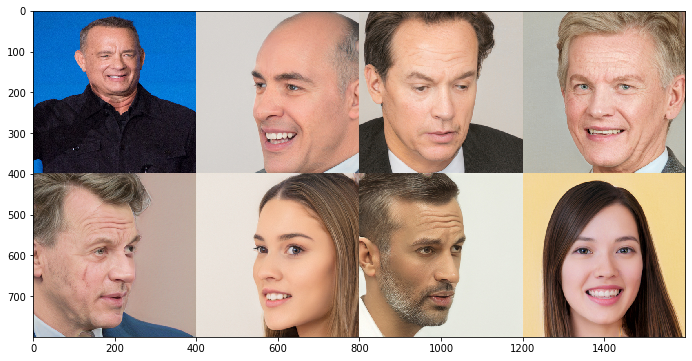

In [132]:
plt.figure(figsize=(12,6))
plt.imshow(cv.cvtColor(montages[0], cv.COLOR_BGR2RGB))

## Sanity Tests

In [111]:
# sort indices
a = np.array([9, 4, 4, 3, 3, 9, 0, 4, 6, 0])
ind = np.argpartition(a, -4)[-4:]
ind = ind[np.argsort(a[ind])]
ind = ind[::-1]
#ind.argsort()[::-1][:len(ind)]
print(ind)
for i in ind:
  print(a[i])

[0 5 8 1]
9
9
6
4


In [112]:
# find similar images
dist = np.sum(np.square(feat_a - feat_b))
print('dist:', dist)
sim = np.dot(feat_a, feat_b.T)
print('sim:', sim)

NameError: name 'feat_a' is not defined

In [1]:
from escpos.connections import getUSBPrinter
#0x04b8  # fixed
  #id_product: 0x0e15  # variable

printer = getUSBPrinter()(idVendor=0x04b8,
                          idProduct=0x0e15,
                          inputEndPoint=0x82,
                          outputEndPoint=0x01) # Create the printer object with the connection params

printer.text("Hello World")
printer.lf()

AttributeError: 'USBPrinter' object has no attribute '_Generic__write'